<div class="alert alert-success" role="alert">
  Hello, Jade! Your project is great! It is very convenient and understandable to read it. Also I like a lot your summaries after each block. It's super useful. I left only one yellow comment. But it's about code and not about data analysis. Congratulations, you finished the project and did it very well:) To finish the course you need only to make presentation and dashboard. I will return the project so you can add links to them in it. I think it's more convenient than to send me them in DM in slack:)
</div>

<div class="alert alert-success" role="alert">
  Congratulations, you finished the course! Last advice: read somewhere how to design the presentations properly with title and finish slides:)
</div>

### Project description

The virtual telephony service CallMeMaybe is developing a new function that will give supervisors information on the least effective operators. An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.

- Carry out exploratory data analysis
- Identify ineffective operators
- Test statistical hypotheses

The dataset `telecom_dataset_us.csv` contains the following columns:
- **user_id** - client account ID
- **date** - date the statistics were retrieved
- **direction** - call direction (**out** for outgoing, **in** for incoming)
- **internal** - whether the call was internal (between a client's operators)
- **operator_id** - operator identifier
- **is_missed_call** - whether the call was missed
- **calls_count** - number of calls
- **call_duration** - call duration (excluding waiting time) in seconds
- **total_call_duration** - call duration (including waiting time) in seconds

The dataset `telecom_clients_us.csv` has the following columns:
- **user_id** - client account ID
- **tariff_plan** - client's current plan
- **date_start** - client's registration date

## Table of Contents
* [1.Opening and reading the data file](#open_data)
    * [1.1.All imports sorted alphabetically](#imports)
    * [1.2.Open the data file and reading the general information](#read_data)
* [2.Data preprocessing](#data_preprocessing)
    * [2.1.Dealing with missing values](#missing_values)
    * [2.2.Changing data type](#data_type)
    * [2.3.Dealing with duplicated data](#duplicated_data)
    * [2.4.Adding date columns to the call data ](#addidng_date)
    * [2.5.Dealing with anomolies in the data ](#anomolies)   
    * [2.6.Data preprocessing brief summary](#brief_summary)
* [3.Exploratory data analysis(EDA)](#eda)
    * [3.1.Mean values and descriptives](#mean_values)
    * [3.2.Mean values in incoming vs outgoing calls](#mean_features_direction)
    * [3.3.Mean feature values for internal vs external calls](#mean_features_intrnal)
    * [3.4.Removing outliers](#outliers)
    * [3.6.EDA summary](#eda_summary)  
* [4.Analysis of the data](#anayze)
    * [4.1.Number of calls per operator, on average and total](#calls_operator)
    * [4.2.Outging calls per operator](#outgoing_calls)
    * [4.3.Missed incoming calls per operator](#missed_incoming)
    * [4.4.Waiting time per operator, on average and total ](#waiting_time)
    * [4.5.Analysis Summary](#analysis_summary)
* [5.Testing hypothesis](#testing_hypothesis)
    * [5.1.Filtering the data](#filtering_data)
    * [5.2.Distribution of ineffective and effective operators data](#disrtibution)
    * [5.3.Testing the hypothesis](#test)
    * [5.4.Testing hypothesis summary](#hypothesis_summary)    
* [6.General conclusion](#general_conclusion) 
* [7.Articles](#Articles) 
* [8.Presentation link](#presentation) 
* [7.Dashboard link](#dashboard) 

### 1. Opening and reading the data file <a class="anchor" id="open_data"></a>

#### All imports sorted alphabetically <a class="anchor" id="imports"></a>

In [1]:
import matplotlib as matp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
from scipy.stats import mannwhitneyu
import seaborn as sns


#### Open the data file and study the general information <a class="anchor" id="read_data"></a>

In [2]:
call_data= pd.read_csv('/datasets/telecom_dataset_us.csv')
client_data= pd.read_csv('/datasets//telecom_clients_us.csv')

In [3]:
call_data.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
27257,167175,2019-10-07 00:00:00+03:00,out,False,905844.0,False,4,330,418
4843,166511,2019-10-18 00:00:00+03:00,in,False,891414.0,False,6,830,893
9603,166658,2019-11-11 00:00:00+03:00,out,False,890404.0,True,10,0,273
42364,167949,2019-11-11 00:00:00+03:00,out,False,941384.0,False,14,2548,2750
7362,166584,2019-08-16 00:00:00+03:00,in,False,NaN,True,2,0,4
3921,166495,2019-11-03 00:00:00+03:00,in,False,NaN,True,1,0,2
37667,167630,2019-11-05 00:00:00+03:00,in,False,920666.0,False,9,1138,1199
35968,167551,2019-10-14 00:00:00+03:00,out,True,919218.0,False,2,164,190
48389,168187,2019-11-08 00:00:00+03:00,out,False,937860.0,True,15,0,284
17286,166916,2019-11-26 00:00:00+03:00,out,True,906402.0,True,1,0,16


In [4]:
call_data.shape

(53902, 9)

In [5]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [6]:
call_data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [7]:
#lets check for dupliactes
np.where(call_data.duplicated().values)

(array([    8,    28,    44, ..., 53875, 53885, 53900]),)

In [8]:
call_data.loc[call_data.duplicated(),:].count()

user_id                4900
date                   4900
direction              4900
internal               4893
operator_id            4184
is_missed_call         4900
calls_count            4900
call_duration          4900
total_call_duration    4900
dtype: int64

**call_data** 
- Data consists of 9 columns and 53902 rows
- We can see missing values for internal (117 values) and operator_id (8172 values)
- We can see that we need to change data type for date and internal(should be Boolean)
- We can change data type for operator_id- making this an int number rather float
- We have duplicated data (4900 rows)

In [9]:
client_data.sample(10)

,user_id,tariff_plan,date_start
530,167480,B,2019-09-18
672,167468,B,2019-09-18
138,168515,C,2019-10-29
582,167738,B,2019-09-27
322,167150,C,2019-09-04
540,168378,B,2019-10-23
466,166946,C,2019-08-26
312,167286,C,2019-09-10
203,168016,C,2019-10-09
529,168583,B,2019-10-31


In [10]:
client_data.shape

(732, 3)

In [11]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [12]:
#lets check for dupliactes
np.where(client_data.duplicated().values)

(array([], dtype=int64),)

**client_data** 
- Data consists of 3 columns and 732 rows
- We dont have any missing values
- We need to change date type for data_start column
- We dont have any duplicated data

### Step 2. Data preprocessing <a class="anchor" id="data_preprocessing"></a>

<br> - **Find and eliminate errors and anomalies in the data
<br> - Take care of duplicates
<br> - Add a seperate column for months**

#### 2.1. Dealing with missing values <a class="anchor" id="missing_values"></a>

In [13]:
#Lets first deal with our missing values before changing our data type 
call_data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [14]:
(117+8172)/len(call_data)

0.15377908055359726

Unfurtunalty we have no way to fill in the missing values here values we dont have any additional data that will allow us to so. I therefore decided to drop these rows of data. 

In [15]:
#lets drop the missing values
call_data=call_data.dropna()

In [16]:
#and lets ensre our data is clean from missing values 
call_data.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

<div class="alert alert-success" role="alert">
  Yes, we can't fill missing values in operator_id column, so to drop them is really the best idea to deal with them. We can fill missing values in 'internal' column somehow. But because there are few missing values, it's also okey to just drop them.
</div>

#### 2.2. Changing data types <a class="anchor" id="data_type"></a>

In [17]:
client_data['date_start']=pd.to_datetime(client_data['date_start'],format='%Y-%m-%d')
call_data['date']=pd.to_datetime(call_data['date'],format='%Y-%m-%d')
call_data['internal']=call_data['internal'].astype('bool')
call_data['operator_id']=call_data['operator_id'].astype(int)

In [18]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
user_id                45670 non-null int64
date                   45670 non-null datetime64[ns, pytz.FixedOffset(180)]
direction              45670 non-null object
internal               45670 non-null bool
operator_id            45670 non-null int64
is_missed_call         45670 non-null bool
calls_count            45670 non-null int64
call_duration          45670 non-null int64
total_call_duration    45670 non-null int64
dtypes: bool(2), datetime64[ns, pytz.FixedOffset(180)](1), int64(5), object(1)
memory usage: 2.9+ MB


#### 2.3. Dealing with duplicated data  <a class="anchor" id="duplicated_data"></a>

In [19]:
#lers recheck duplicated data now that we have deleated rows with missing values 
call_data.loc[call_data.duplicated(),:].count()

user_id                4179
date                   4179
direction              4179
internal               4179
operator_id            4179
is_missed_call         4179
calls_count            4179
call_duration          4179
total_call_duration    4179
dtype: int64

we now have 4179 rows of duplicated data compared with the 4900 rows we had before deleating missing values

In [20]:
#Lets see what percntage of our data is duplicated 
4197/len(call_data)

0.09189840157652726

9 percent of the data is duplicated. We will now drop these dupicated rows. 

In [21]:
#mark duplicated rows as True except for the first occurence
call_data.loc[call_data.duplicated(keep='first'),:]
#drop duplicates:
call_data= call_data.drop_duplicates(keep='first')

In [22]:
#and lets ensure we no longer have duplicated data 
call_data.loc[call_data.duplicated(),:].count()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

#### 2.4. Adding date columns to the call data <a class="anchor" id="addidng_date"></a>

In [23]:
call_data['month']=pd.DatetimeIndex(call_data['date']).month
call_data['day']=pd.DatetimeIndex(call_data['date']).day
call_data['call_waiting_time']=call_data['total_call_duration']-call_data['call_duration']

#### 2.5. dealing with anomolies in the data <a class="anchor" id="anomolies"></a>

In [24]:
#Lets see if we have any missed calls with call duration more the 0, as a missed call should not have any time on it
currupt_data=call_data.loc[(call_data['is_missed_call']==True) & (call_data['call_duration']>5)]
currupt_data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,day,call_waiting_time
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478,True,1,165,173,11,19,8
2283,166407,2019-09-23 00:00:00+03:00,in,False,888534,True,1,133,156,9,23,23
2956,166485,2019-09-09 00:00:00+03:00,in,False,887276,True,1,31,44,9,9,13
3376,166485,2019-10-31 00:00:00+03:00,in,False,887276,True,1,79,123,10,31,44
3975,166503,2019-08-12 00:00:00+03:00,in,True,884408,True,1,38,69,8,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...
51488,168307,2019-10-30 00:00:00+03:00,in,False,945052,True,2,56,70,10,30,14
51577,168336,2019-10-30 00:00:00+03:00,in,False,948756,True,1,50,58,10,30,8
51664,168336,2019-11-12 00:00:00+03:00,in,False,947304,True,1,69,72,11,12,3
51693,168336,2019-11-15 00:00:00+03:00,in,False,947304,True,1,46,49,11,15,3


we can see that we have 180 entries whereby the missed call is inciated True, however there is a recorded call time.Meaning these should be indicated False as they are not missed calls.  

In [25]:
#lets change the status for these from True to False
call_data.loc[(call_data['is_missed_call']==True) & (call_data['call_duration']>5), "is_missed_call"]=False

In [26]:
#lets check changes were applied
currupt_data_check=call_data.loc[(call_data['is_missed_call']==True) & (call_data['call_duration']>5)]
currupt_data_check

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,day,call_waiting_time


#### 2.6. Data preprocessing brief summary <a class="anchor" id="brief_summary"></a>

- Deleated missing values for call_data, internal (117 values)
- Deleated missing values for call_data, operator_id (8172 values)
- 15 percent of the call_data was deletated in total
- Data type was canges where neccessary
- Duplicated data was deleated for call_data, a total of 9 percent of the data. 
- Currupt data for 'is missed call' was fixed, whereby calls with call duration greater than 0 were change to False. 

<div class="alert alert-success" role="alert">
  All is fine in this part:)
</div>

### 3. Exploratory data analysis (EDA) <a class="anchor" id="eda"></a>

#### 3.1. Mean values and descriptives <a class="anchor" id="mean_values"></a>

In [27]:
#letd firts look at the dexcriptive statatistics of our data
call_data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,month,day,call_waiting_time
count,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000
mean,167301.113543,916516.771155,16.921381,1010.940011,1323.153238,10.210961,16.923333,312.213227
std,600.513986,21234.081589,59.786187,4066.666485,4788.953155,0.844366,8.469598,1176.102940
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000
25%,166782.000000,900790.000000,1.000000,0.000000,67.000000,10.000000,10.000000,19.000000
50%,167175.000000,913938.000000,4.000000,106.000000,289.000000,10.000000,18.000000,60.000000
75%,167827.000000,937708.000000,14.000000,772.000000,1107.000000,11.000000,24.000000,219.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000,11.000000,31.000000,46474.000000


- Our mean call duration is 1010 seconds, which is 16.8 minutes. It also apears that we have outliers here, as the 75% percentile of the call duration is 772 seconds, quivelent to 12.8 minutes, but we have a max value of 144395 seconds which is 2406 minutes- surely this seems strange. 
- Our total call duration which is our call duration including the waiting time has a mean value of 1323, which is 22 minutes, and here too, we can see opossible outliers as our max values id 166255, which is 2769 minutes, way too long for a phone call, even if this does have the waiting time added. 
- We can see that our data was collected over 4 months,with the min month being Augost, and max month  November. 
- Our call waiting tme also appears to have outliers wih our max value being 46474, so 774 minutes. This makes sense as we got this figure from deducting our call duration forom total call duration.  
- It seems that we haveour call count on average is 16.9 and that our 75th perrcentile have around 14 calls. So th max value here of 4817 also seems extremely strange, and appears to be an extreme outlier.  

In [28]:
#lets see how many enteries we have per each month of our collected data
call_data.month.value_counts()

11    18620
10    14474
9      6927
8      1470
Name: month, dtype: int64

In [29]:
#Lets see how many unique operators we have
total_operators=call_data.operator_id.nunique()
print('Number of operators:', total_operators)

Number of operators: 1092


In [30]:
#lets see how many missed calls we have vs calls that arn't considered to be missed 
call_data.is_missed_call.value_counts()

False    27562
True     13929
Name: is_missed_call, dtype: int64

In [31]:
#lets see how many incoming and outcoming calls we have
call_data.direction.value_counts()

out    28813
in     12678
Name: direction, dtype: int64

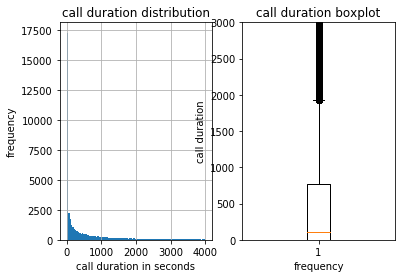

In [32]:
#lets see whats going on with our call duration as it seems that we have outliers here.
plt.subplot(1, 2, 1)
call_data.call_duration.hist(bins=100, range=(0, 4000))
plt.title('call duration distribution')
plt.xlabel('call duration in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(call_data['call_duration'])
plt.title('call duration boxplot')
plt.ylabel('call duration')
plt.xlabel('frequency')
plt.ylim(0, 3000)
plt.show()

- It appears that anything above 2000 is considered to be an outlier.
- Lets check if the distribution of data changes based on incoming or outgoing call.

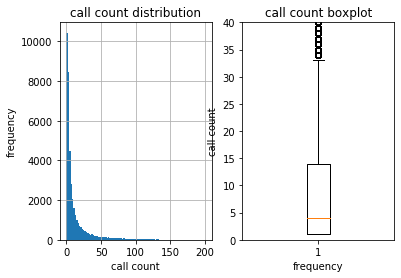

In [33]:
#lets see whats going on with our call count as it seems that we have outliers here.
plt.subplot(1, 2, 1)
call_data.calls_count.hist(bins=100, range=(0, 200))
plt.title('call count distribution')
plt.xlabel('call count')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(call_data['calls_count'])
plt.title('call count boxplot')
plt.ylabel('call count')
plt.xlabel('frequency')
plt.ylim(0, 40)
plt.show()

- It appears that anything above 33 calls is considered to be an outlier

#### 3.2. Mean feature values in incoming vs outgoing calls <a class="anchor" id="mean_features_direction"></a>

In [34]:
#lets first see how many inming vs outgoing calls we have
call_data.direction.value_counts()

out    28813
in     12678
Name: direction, dtype: int64

In [35]:
#lets divide the data into incoming and outgoing calls 
incoming_calls = call_data.query('direction == "in"')
outgoing_calls = call_data.query('direction == "out"')

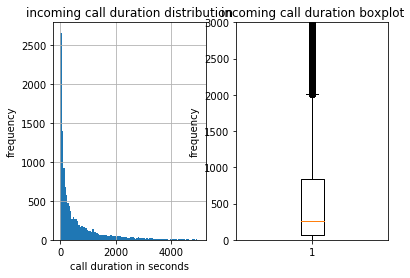

In [36]:
# now lets looks at the dustibution of call duration for incoming calls
plt.subplot(1, 2, 1)
incoming_calls.call_duration.hist(bins=100, range=(0, 5000))
plt.title('incoming call duration distribution')
plt.xlabel('call duration in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(incoming_calls['call_duration'])
plt.title('incoming call duration boxplot')
plt.ylabel('call duration')
plt.ylabel('frequency')
plt.ylim(0, 3000)
plt.show()

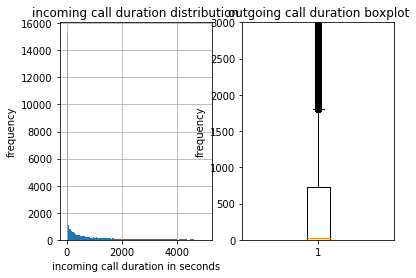

In [38]:
#and lets do the same with our outgoing calls
plt.subplot(1, 2, 1)
outgoing_calls.call_duration.hist(bins=100, range=(0, 5000))
plt.title('incoming call duration distribution')
plt.xlabel('incoming call duration in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(outgoing_calls['call_duration'])
plt.title('outgoing call duration boxplot')
plt.ylabel('call duration')
plt.ylabel('frequency')
plt.ylim(0, 3000)
plt.show()

- For our incoming calls, we can see that call durations above 2000 seconds are considered to be outliers
- For our outgoing calls, we can see that call durations above 1800 seconds are considered to be outliers

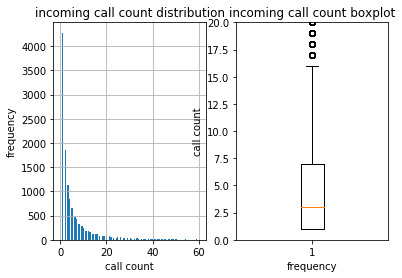

In [39]:
# now lets looks at the dustibution of call count for incoming calls
plt.subplot(1, 2, 1)
incoming_calls.calls_count.hist(bins=100, range=(0, 60))
plt.title('incoming call count distribution')
plt.xlabel('call count')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(incoming_calls['calls_count'])
plt.title('incoming call count boxplot')
plt.ylabel('call count')
plt.xlabel('frequency')
plt.ylim(0, 20)
plt.show()

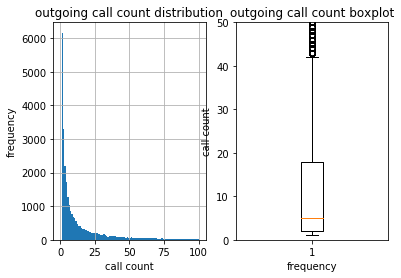

In [40]:
# now lets looks at the dustibution of call count for outgoing calls
plt.subplot(1, 2, 1)
outgoing_calls.calls_count.hist(bins=100, range=(0, 100))
plt.title('outgoing call count distribution')
plt.xlabel('call count')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(outgoing_calls['calls_count'])
plt.title('outgoing call count boxplot')
plt.ylabel('call count')
plt.xlabel('frequency')
plt.ylim(0, 50)
plt.show()

- For our incoming calls, we can see that we have a very small call count, and that we have many outliers, we would say anything above a call count of 16.
- For our outgoing calls, we can see that we have a very small call count, and that we have many outliers, we would say anything above a call count of 43.

#### 3.3. Mean feature values for internal vs external calls <a class="anchor" id="mean_features_intrnal"></a>

In [41]:
#lets first see how many internal calls we have
call_data.internal.value_counts()

False    36161
True      5330
Name: internal, dtype: int64

In [42]:
#lets see what percentage of the data this is 
5330/len(call_data)

0.128461594080644

only 5330 calls,making up 12 percent of the calls in the data, are internal 

In [43]:
#lets now divide the data into internal and external calls 
internal_calls = call_data.query('internal == True')
external_calls = call_data.query('internal == False')

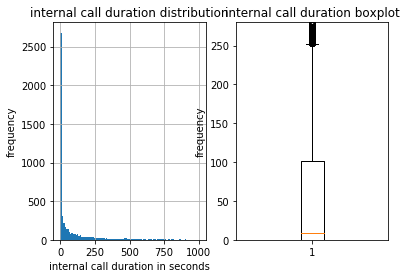

In [44]:
# now lets looks at the dustibution of call duration for internal calls, and understand if we have outliers
plt.subplot(1, 2, 1)
internal_calls.call_duration.hist(bins=100, range=(0, 1000))
plt.title('internal call duration distribution')
plt.xlabel('internal call duration in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(internal_calls['call_duration'])
plt.title('internal call duration boxplot')
plt.ylabel('internal call duration')
plt.ylabel('frequency')
plt.ylim(0, 280)
plt.show()

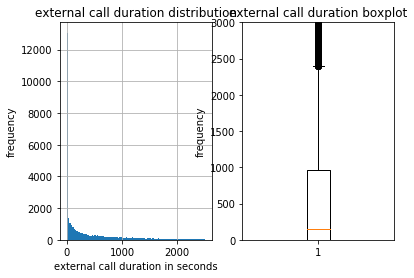

In [45]:
# now lets looks at the dustibution of call duration for external calls, and understand if we have outliers
plt.subplot(1, 2, 1)
external_calls.call_duration.hist(bins=100, range=(0, 2500))
plt.title('external call duration distribution')
plt.xlabel('external call duration in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(external_calls['call_duration'])
plt.title('external call duration boxplot')
plt.ylabel('external call duration')
plt.ylabel('frequency')
plt.ylim(0, 3000)
plt.show()

- it seems that majority of the calls for internall calls, have a duration of less than 250 seconds. Anythng abve this seems to be an outier 
- it seems that majority of the calls for external calls, have a duration of less than 2400 seconds. Anythng abve this seems to be an outier 

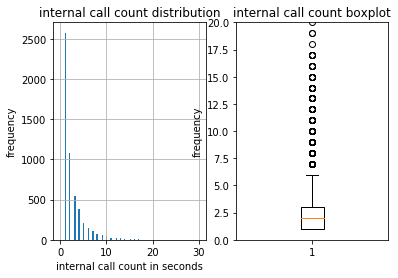

In [46]:
# now lets looks at the dustibution of call count for internal calls, and understand if we have outliers
plt.subplot(1, 2, 1)
internal_calls.calls_count.hist(bins=100, range=(0, 30))
plt.title('internal call count distribution')
plt.xlabel('internal call count in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(internal_calls['calls_count'])
plt.title('internal call count boxplot')
plt.ylabel('internal call count')
plt.ylabel('frequency')
plt.ylim(0, 20)
plt.show()

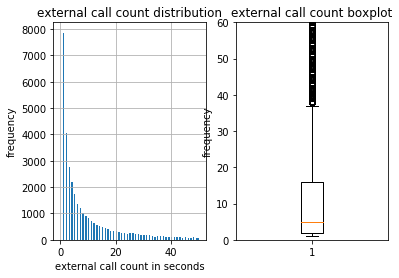

In [47]:
# now lets looks at the dustibution of call count for external calls, and understand if we have outliers
plt.subplot(1, 2, 1)
external_calls.calls_count.hist(bins=100, range=(0, 50))
plt.title('external call count distribution')
plt.xlabel('external call count in seconds')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.boxplot(external_calls['calls_count'])
plt.title('external call count boxplot')
plt.ylabel('external call count')
plt.ylabel('frequency')
plt.ylim(0, 60)
plt.show()

- For our iternal calls, we can see that we have a very small call count, and that we have many outliers, we would say anything above a call count of 6.
- For our external calls, we can see that we have a very small call count, and that we have many outliers, we would say anything above a call count of 38.

#### 3.4. Removing outliers <a class="anchor" id="outliers"></a>

Lets calculat the percenage of outliers in the data before dropping them. 

In [49]:
#lets see how many outliers we have in our data for call duration based on incoming and outgoing
incoming_call_outliers=incoming_calls.query('call_duration > 2000')
print('Outliers for incoming calls:', len(incoming_call_outliers))
outgoing_calls_outliers=outgoing_calls.query('call_duration > 1800')
print('Outliers for outgoing calls:', len(outgoing_calls_outliers))

Outliers for incoming calls: 1212
Outliers for outgoing calls: 4208


In [50]:
#Lets see what percentage our outliers are out of our total call data
(len(incoming_call_outliers)+len(outgoing_calls_outliers))/ len(call_data)

0.13063073919645224

It appears that 13 percent of our call_data are ouliers. 

In [51]:
#lets drop these
clean_call_data1= call_data.drop(call_data[(call_data.call_duration > 2000) & (call_data.direction == "in")].index)
clean_call_data2= clean_call_data1.drop(clean_call_data1[(clean_call_data1.call_duration > 1800) & (clean_call_data1.direction == "out")].index)
clean_call_data=clean_call_data2
len(clean_call_data)

36071

In [52]:
#lets see how many outliers we have in our clan data for call count based on incoming and outgoing
incoming_call_count_outliers=clean_call_data.query('direction == "in" and calls_count > 16')
print('Outliers for incoming calls:', len(incoming_call_count_outliers))
outgoing_calls_count_outliers=clean_call_data.query('direction == "out" and calls_count > 43')
print('Outliers for outgoing calls:', len(outgoing_calls_count_outliers))

Outliers for incoming calls: 392
Outliers for outgoing calls: 1509


In [53]:
#Lets see what percentage our outliers are out of our total clean call data
(len(incoming_call_count_outliers)+len(outgoing_calls_count_outliers))/ len(clean_call_data)

0.052701616256826816

the percentage of outliers for call count in our clean data is 5%. lets drop these too. 

In [54]:
#lets drop these
clean_call_data3= clean_call_data.drop(clean_call_data[(clean_call_data.calls_count > 16) & (clean_call_data.direction == "in")].index)
clean_call_data4= clean_call_data.drop(clean_call_data[(clean_call_data.calls_count > 43) & (clean_call_data.direction == "out")].index)
clean_call_data=clean_call_data4
len(clean_call_data)

34562

#### 3.5. EDA Summary <a class="anchor" id="eda_summary"></a>

- our data coveres a period of 4 months
- our data has 1092 unique operators
- our data consisted of 41491 enteries
- our data had extreme outliers in the call duration column 
- we deleted outliers for extremely long call duration based on our analysis using histograms and boxplots, 13 percent of the data
- we deleted outliers for extremely high call count based on our analysis using histograms and boxplots, 5 percent of the already cleaned data
- our new clean data now exists of 34562 entereies

<div class="alert alert-success" role="alert">
  This part is also fine:)
</div>

<div class="alert alert-warning" role="alert">
  But I see one possible code improvement. You plotted the same two graphs several times and duplicated the code by this. It's better to write a function to plot these graphs to avoid code duplication. 
</div>

### 4. Analyis of the data  <a class="anchor" id="anayze"></a>

#### 4.1. Number of calls per operator, on average and total <a class="anchor" id="calls_operator"></a>

In [55]:
#lets first see how many operators we have in our clean data
clean_call_data.operator_id.nunique()

1088

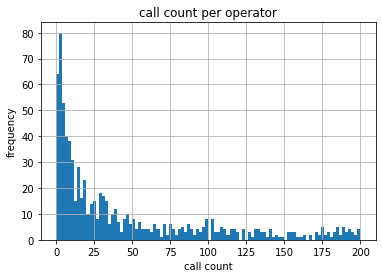

In [56]:
#lets calculate the total amount of calls per operator and look at the distribution of this
calls_per_operator=clean_call_data.groupby('operator_id')['calls_count'].sum().reset_index()
calls_per_operator.columns=['operator_id','call_count']
calls_per_operator.hist('call_count',bins=100, range=(0,200))
plt.title('call count per operator')
plt.xlabel('call count')
plt.ylabel('frequency');

In [57]:
calls_per_operator.call_count.describe()

count    1088.000000
mean      194.121324
std       338.180529
min         1.000000
25%         9.000000
50%        48.000000
75%       232.000000
max      3247.000000
Name: call_count, dtype: float64

In [58]:
#lets look at the mode as we seem to have a huge standard deviation from the mean
calls_per_operator.call_count.mode()

0    1
dtype: int64

We can see that the mean call count is 194 per operator, using the mode, we know that majority of our calls count are 1. 

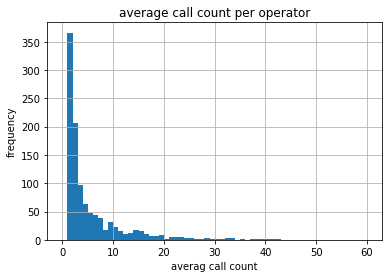

In [59]:
#lets calculate the average amount of calls per operator and look at the distribution of this
avg_calls_per_operator=clean_call_data.groupby('operator_id')['calls_count'].mean().reset_index()
avg_calls_per_operator.columns=['operator_id','avg_call_count']
avg_calls_per_operator.hist('avg_call_count',bins=60, range=(0,60))
plt.title('average call count per operator')
plt.xlabel('averag call count')
plt.ylabel('frequency');

In [60]:
avg_calls_per_operator.avg_call_count.describe()

count    1088.000000
mean        5.584855
std         6.656995
min         1.000000
25%         1.595161
50%         2.738844
75%         6.691556
max        42.000000
Name: avg_call_count, dtype: float64

We can see that the mean call count is 5.58 per operator, whereby 50% of our operators have a call count of 2.7.

In [61]:
#now lets look at the mode
avg_calls_per_operator.avg_call_count.mode()

0    1.0
dtype: float64

we can see that majority of our operators have an average call count of 1

**Summary**
- We have 1088 unique operators
- The mean for total call count per operator is 194 
- Using the mode, we can see that majority of operators have a total call count of 1. 
- The mean for average call count per operator is 5.58
- Using the mode we can see that majority of our operators have an average call count of 1. 

#### 4.2 Outging calls per operator  <a class="anchor" id="outgoing_calls"></a>

 if an operator is supposed to make outgoing calls, a small number of them is a sign of ineffectiveness.

In [62]:
#lets first get our operators who have outgoing calls to clients  
outgoing_calls=clean_call_data.query('direction == "out" and internal==False')
outgoing_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,day,call_waiting_time
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,8,5,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,8,5,26
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50,8,5,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278,True,3,0,29,8,6,29
11,166377,2019-08-06 00:00:00+03:00,out,False,880020,True,5,0,70,8,6,70


In [64]:
#Lets see how many operators we have in our outgoing calls data
outgoing_calls.operator_id.nunique()

829

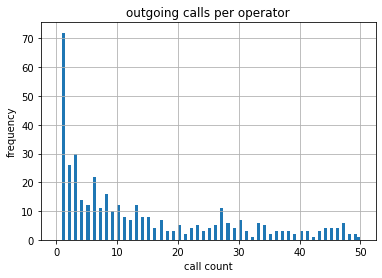

In [65]:
#lets calculate the total amount of outgoig calls per operator and look at the distribution
total_outgoing_calls=outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index()
total_outgoing_calls.columns=['operator_id','call_count']
total_outgoing_calls.hist('call_count',bins=100, range=(0,50))
plt.title('outgoing calls per operator')
plt.xlabel('call count')
plt.ylabel('frequency');

In [66]:
total_outgoing_calls.call_count.describe()

count     829.000000
mean      180.449940
std       292.562387
min         1.000000
25%         9.000000
50%        54.000000
75%       213.000000
max      2179.000000
Name: call_count, dtype: float64

Our mean total call count for outgoing calls is 180.4, whilst the median is 54. 

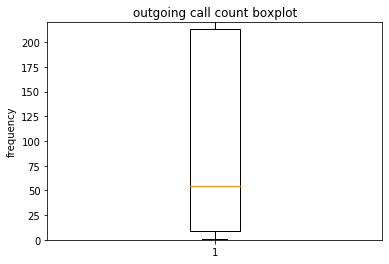

In [67]:
#lets use a boxplot to determine what is classed as a small number of outgoing calls in our data set
plt.boxplot(total_outgoing_calls['call_count'])
plt.title('outgoing call count boxplot')
plt.ylabel('call count')
plt.ylabel('frequency')
plt.ylim(0, 220)
plt.show()

it seems that anything less than 10 outgoing calls in our data is considered a a small number of outgoing calls in our data set

In [68]:
#lets see how many operators we have with less then 10 calls 
less_ten_call=total_outgoing_calls.query('call_count < 10')
less_ten_call.operator_id.nunique()

213

we see that we have may operators with a count of one outgoing call in total. 

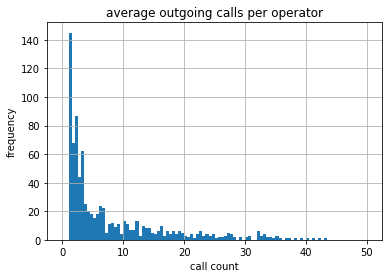

In [69]:
#lets calculate the average amount of outgoing calls per operator and look at the distribution
avg_outgoing_calls=outgoing_calls.groupby('operator_id')['calls_count'].mean().reset_index()
avg_outgoing_calls.columns=['operator_id','avg_call_count']
avg_outgoing_calls.hist('avg_call_count',bins=100, range=(0,50))
plt.title('average outgoing calls per operator')
plt.xlabel('call count')
plt.ylabel('frequency');

In [70]:
avg_outgoing_calls.avg_call_count.describe()

count    829.000000
mean       7.807685
std        8.713775
min        1.000000
25%        1.900000
50%        3.727273
75%       10.875000
max       43.000000
Name: avg_call_count, dtype: float64

Our mean average call count for outgoing calls is 7.8 whilst the median is 3.7. 

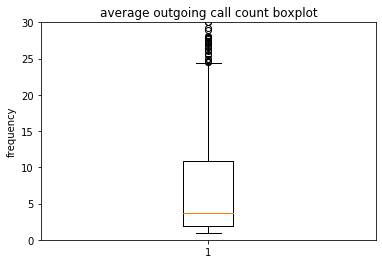

In [71]:
#lets use a boxplot to determine what is classed as a small average number of outgoing calls in our data set
plt.boxplot(avg_outgoing_calls['avg_call_count'])
plt.title('average outgoing call count boxplot')
plt.ylabel('call count')
plt.ylabel('frequency')
plt.ylim(0, 30)
plt.show()

it seems that anything less than 2 outgoing calls in our data is considered a a small number of outgoing calls.

In [72]:
#lets see how many operators have less then 2 calls on avergae 
less_two_call=avg_outgoing_calls.query('avg_call_count < 2')
less_two_call.operator_id.nunique()

213

**Summary**
- We have 829 unique operators that have outgoing calls to customers (internal=False)
- Our mean total call count for outgoing calls is 180.4, whilst the median is 54. 
- Our mean average call count for outgoing calls is 7.8 whilst the median is 3.7. 
- We have 213 operators that have made a total of leass than 10 outgoing call throughout the entire time data was collected 
- We have 213 operators who made less than 2 calls on average

#### 4.3. Missed incoming calls per operator <a class="anchor" id="missed_incoming"></a>

An operator is considered ineffective if they have a large number of missed incoming calls. Lets analyze our data and see which operator has the highest amount of incoming missed calls. 

In [73]:
#lets see how many incomming missed calls we have 
incoming_missed= clean_call_data.query('direction == "in" and is_missed_call == True')
print('number of incoming missed calls is:', len(incoming_missed))

number of incoming missed calls is: 522


In [74]:
#lets see how many operators we have in our missed incoming calls data
incoming_missed.operator_id.nunique()

200

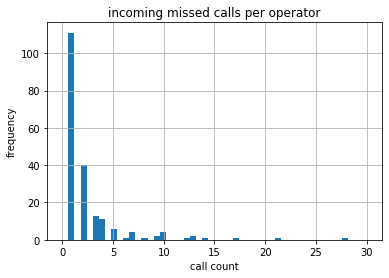

In [75]:
#and now lets see the distribution of the incoming missed calls per operator
missed_operator_count=incoming_missed.groupby('operator_id')['is_missed_call'].count().reset_index()
missed_operator_count.hist('is_missed_call',bins=50, range=(0,30))
plt.title('incoming missed calls per operator')
plt.xlabel('call count')
plt.ylabel('frequency');

In [76]:
missed_operator_count.is_missed_call.describe()

count    200.000000
mean       2.610000
std        3.473937
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       28.000000
Name: is_missed_call, dtype: float64

we see that 50% of our operators only have 1 missed call and that the 75 percentile of our data only has 2 missed calls. Our mean is close to 3 missed calls so its fair to say that 28 missed calls is extremely high in comparison.

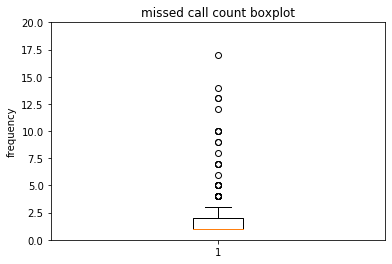

In [77]:
#lets use a boxplot to determine what is classed as a high amount of missed calls in this data set
plt.boxplot(missed_operator_count['is_missed_call'])
plt.title('missed call count boxplot')
plt.ylabel('missed call count')
plt.ylabel('frequency')
plt.ylim(0, 20)
plt.show()

According to our boxplot, anthing above 3 calls is considered high (an outlier). 

In [78]:
#lets see how many of our operators have more than 3 missed calls 
missed_more_three=missed_operator_count.query('is_missed_call > 3')
missed_more_three.operator_id.nunique()

36

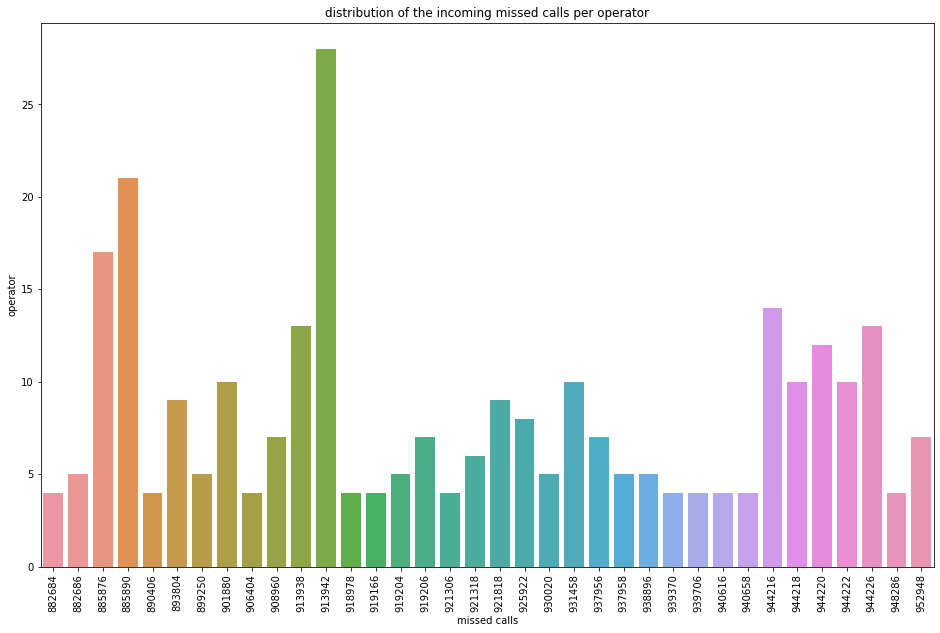

In [79]:
#lets visualise our operators with more than 3 missed calls
plt.figure(figsize=(16,10))
sns.barplot(x='operator_id', y='is_missed_call', data=missed_more_three, linewidth=10)
plt.xticks(rotation = 90)
plt.title("distribution of the incoming missed calls per operator")
plt.ylabel("operator")
plt.xlabel("missed calls");

In [80]:
#lets print the operator that has the largest amount of missed calls. 
missed_operator_count=missed_operator_count.sort_values(by='is_missed_call', ascending=False)
missed_operator_count.head(1)

,operator_id,is_missed_call
82,913942,28


we can see that operator 913942 has the highest total amountof missed calls, 28 missed calls. 

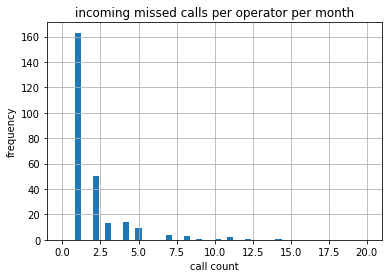

In [81]:
#now lets see the distribution of the incoming missed calls per operator per month
missed_operator_month=incoming_missed.groupby(['operator_id', 'month'])['is_missed_call'].count().reset_index()
missed_operator_month=missed_operator_month.sort_values(by='is_missed_call', ascending=False)
missed_operator_month.hist('is_missed_call',bins=50, range=(0,20))
plt.title('incoming missed calls per operator per month')
plt.xlabel('call count')
plt.ylabel('frequency');


In [82]:
missed_operator_month.is_missed_call.mean()

1.9923664122137406

We can see that majority of the operators dont have more than 2 missed calls per month, with majority having only one. 

In [83]:
#lets see how many of our operators have more than 2 missed calls per month 
missed_month_two=missed_operator_month.query('is_missed_call > 2')
missed_month_two.operator_id.nunique()

34

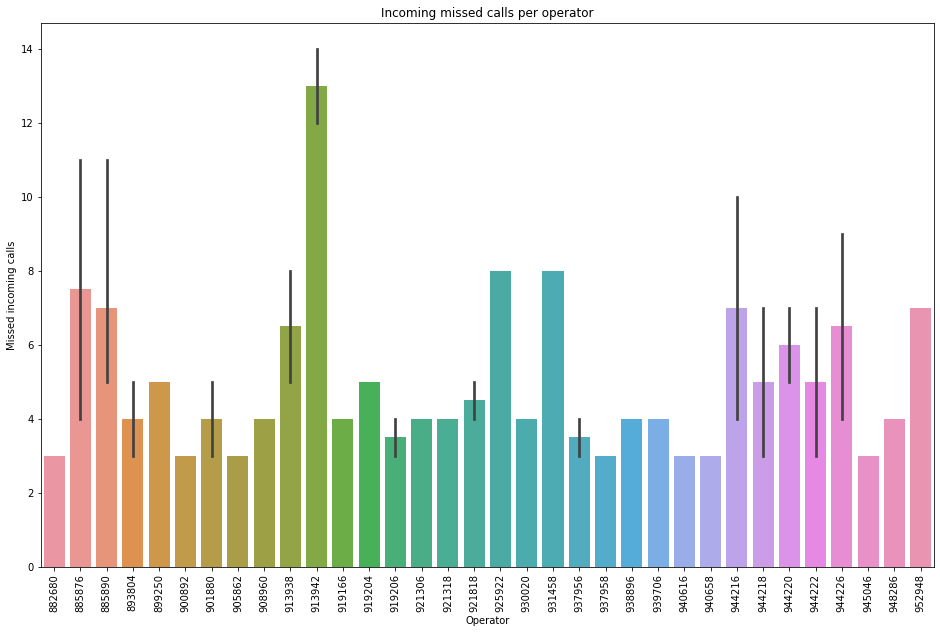

In [84]:
#lets print the operatos with more than 2 missed calls per month
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
sns.barplot(x='operator_id', y='is_missed_call', data=missed_month_two, linewidth=10)
plt.title("Incoming missed calls per operator")
plt.ylabel("Missed incoming calls")
plt.xlabel("Operator");

In [85]:
missed_month_two.head(10)

,operator_id,month,is_missed_call
118,913942,10,14
119,913942,11,12
12,885890,9,11
9,885876,9,11
234,944216,11,10
242,944226,11,9
177,931458,11,8
162,925922,10,8
116,913938,11,8
236,944218,11,7


When we group by month, we can see that operator 913942 still has the highest total amount of of missed calls, this being for October and November. 

#### Summary
- We have 522 missed incoming calls. 
- We have a total of 200 operators with missed incoming calls.
- Majority of our operators have a total of 3 mised calls.
- We have 36 operators with more than 3 missed calls.
- Operator 913942 has the highest total amount of incoming missed calls, 28 missed calls. 
- Operator 913942 has the most incoming missed calls in total and for Novemner and October. 

#### 4.4. Waiting time per operator, on average and total <a class="anchor" id="waiting_time"></a>

In [86]:
#lets first get our data for incoming calls that are not missed calls
incoming_calls_ = clean_call_data.query('direction == "in" and is_missed_call == False')

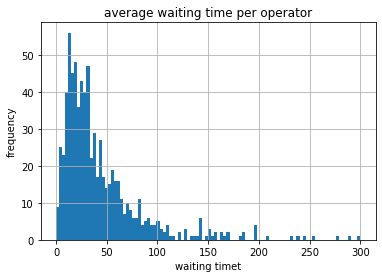

In [87]:
#lets see the distribution of our avg waiting time is for the data
avg_waiting_time = incoming_calls_.pivot_table(index='operator_id', values='call_waiting_time')
avg_waiting_time.hist('call_waiting_time',bins=100, range=(0,300))
plt.title('average waiting time per operator')
plt.xlabel('waiting timet')
plt.ylabel('frequency');

In [88]:
avg_waiting_time.call_waiting_time.describe()

count    753.000000
mean      47.988220
std       62.337743
min        1.000000
25%       17.142857
50%       30.358974
75%       55.700000
max      714.500000
Name: call_waiting_time, dtype: float64

Our mean average waiting time is 47.9 meanng the average waiting time for majority of the incoming calls is less than 50 seconds, so less than a minute. 

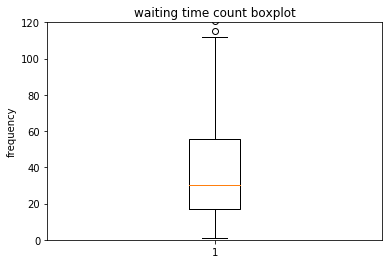

In [89]:
#lets use a boxplot to determine what is classed as a long waiting time in this data set
plt.boxplot(avg_waiting_time['call_waiting_time'])
plt.title('waiting time count boxplot')
plt.ylabel('waiting time')
plt.ylabel('frequency')
plt.ylim(0, 120)
plt.show()

According to our boxplot, anything above 115 seconds is considered an outlier, we can thus assume that any average waiting time above 115 seconds, that is close to 2 minutes, is a long waiting time. 

In [90]:
#lets see how many operators we have with more than 115 seconds average waiting time
long_avg_waiting=avg_waiting_time.query('call_waiting_time > 115').reset_index()
long_avg_waiting.operator_id.nunique()

52

In [91]:
#lets print the 10 operators with the longest avg waiting time
longest_waiting_time =avg_waiting_time.sort_values(by='call_waiting_time', ascending=False).reset_index()
longest_waiting_time.head(10)

,operator_id,call_waiting_time
0,919794,714.500000
1,906076,611.500000
2,919206,430.000000
3,919790,409.633333
4,919554,401.641509
5,919552,400.266667
6,919792,363.215686
7,958460,337.533333
8,882688,336.500000
9,906406,335.500000


The operator with the highest avg waiting time is 919794, with a wating time of 12 minutes. 

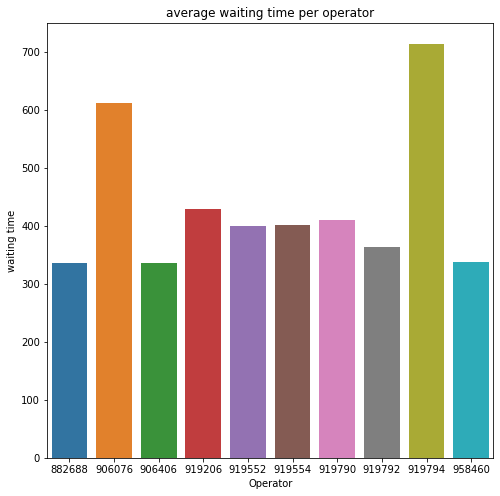

In [92]:
#lets visualize this
longest_waiting_operator=longest_waiting_time.head(10)
plt.figure(figsize=(8,8))
sns.barplot(x='operator_id', y='call_waiting_time', data=longest_waiting_operator, linewidth=10)
plt.title("average waiting time per operator")
plt.ylabel("waiting time")
plt.xlabel("Operator");

we can see that the longest average waiting time is for operator 919794, an average time of 10 minutes. This is followed by operator 906076	 with an average waiting time of 10.1 minutes. "

In [93]:
#now lets see the average waiting time per operator per month
avg_waiting_month=incoming_calls.groupby(['operator_id', 'month'])['call_waiting_time'].mean().reset_index()
avg_waiting_month=avg_waiting_month.sort_values(by='call_waiting_time', ascending=False)
avg_waiting_month.head()

,operator_id,month,call_waiting_time
528,906070,10,1330.111111
816,919794,10,1063.055556
551,906404,9,1010.000000
811,919790,11,974.607143
554,906406,9,951.000000


The longest average waiting time was in October for operator 906070. 

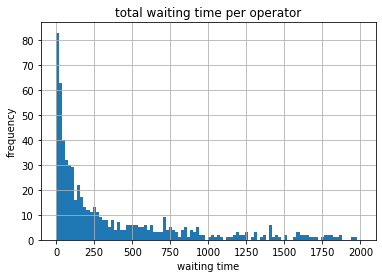

In [94]:
#lets look at the distribution of the total waiting time_waiting_month=incoming_calls.groupby(['operator_id', 'month'])['call_waiting_time'].mean().reset_index()
#lets see the distribution of our avg waiting time is for the data
total_waiting=incoming_calls.groupby(['operator_id'])['call_waiting_time'].sum().reset_index()
total_waiting.hist('call_waiting_time',bins=100, range=(0,2000))
plt.title('total waiting time per operator')
plt.xlabel('waiting time')
plt.ylabel('frequency');

In [95]:
total_waiting.call_waiting_time.describe()

count      754.000000
mean      1634.348806
std       4633.250488
min          1.000000
25%         61.250000
50%        255.000000
75%       1062.000000
max      52795.000000
Name: call_waiting_time, dtype: float64

our total waiting time has a mean of 1634. however the satndars deviation is large here, so we will use the boxplot to get a btter idea of our distribution 

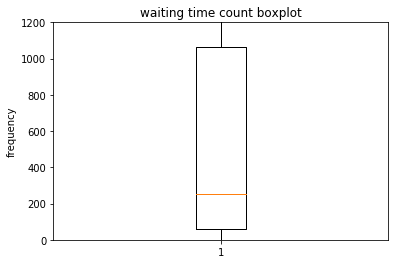

In [96]:
#lets use a boxplot to determine what is classed as a long waiting time in this data set
plt.boxplot(total_waiting['call_waiting_time'])
plt.title('waiting time count boxplot')
plt.ylabel('waiting time')
plt.ylabel('frequency')
plt.ylim(0, 1200)
plt.show()

According to our boxplot, anything above 1100 seconds is considered an outlier and we can thus assume this is a long total waiting time for this data set. 

In [97]:
#lets see how many operators we have with more than 1100 seconds waiting time
long_total_waiting=total_waiting.query('call_waiting_time > 1100').reset_index()
long_total_waiting.operator_id.nunique()

187

In [98]:
#lets now groupby operator and month and find total waiting time per operator per month
total_waiting_month=incoming_calls.groupby(['operator_id', 'month'])['call_waiting_time'].sum().reset_index()
total_waiting_month=total_waiting_month.sort_values(by='call_waiting_time', ascending=False)
total_waiting_month.head(10)

,operator_id,month,call_waiting_time
811,919790,11,27289
1014,931458,11,24697
810,919790,10,21820
710,913938,10,21071
867,921318,11,21061
807,919554,10,20448
816,919794,10,19135
804,919552,10,18458
805,919552,11,17637
808,919554,11,16760


The longest total waiting time was in November, for operator 919790. 

- the mean waiting time is 48 seconds.
- average waiting time above 120 seconds is considered a long waiting time.
- total waiting time above 1100 seconds is considered a long waiting time.
- we have 52 operators with long waiting time
- the longest average waiting time is for operator 919794.
- The longest total waiting time was in November, for operator 919790. 

#### 4.5. Analysis Summary <a class="anchor" id="analysis_summary"></a>

<br>**Total and average call count per operator:**
- We have 1088 unique operators
- The mean for total call count per operator is 194 
- The mean for average call count per operator is 5.58

<br> **Outging calls per operator:**
- We have 829 unique operators that have outgoing calls to customers (internal=False)
- Our mean total call count for outgoing calls is 180.4, whilst the median is 54. 
- Our mean average call count for outgoing calls is 7.8 whilst the median is 3.7. 
- Anything less than 10 outgoing calls (total) in our data is considered a a small number of outgoing calls.
- Aything less than 2 outgoing calls on averge  in our data is considered a small number of outgoing calls.
- We have 213 operators that have made a total of leass than 10 outgoing call throughout the entire time data was collected 
- We have 213 operators who made less than 2 calls on average

<br>**Missed incoming calls per operator:**
- We have 522 missed incoming calls. 
- We have a total of 200 operators with missed incoming calls.
- Majority of our operators have a no more than 3 missed calls.
- We have 36 operators with more than 3 missed calls.
- Operator 913942 has the highest total amount of incoming missed calls, 28 missed calls. 
- Operator 913942 has the most incoming missed calls in total and for Novemner and October. 

<br>**Average waiting time per oerator:**
- Our mean average waiting time is 47.9 meaning the average waiting time for majority of the incoming calls is less than 50 seconds, so less than a minute. 
- The operator with the highest avg waiting time in general is operator 919794, with a wating time of 12 minutes. 
- We have 52 operators with long waiting time.
- The longest average waiting time was in October for operator 906070. 

<br>**Total waiting time per operator**
- our total waiting time has a mean waiting time of 1634 seconds. 
- Anything above 1100 seconds is considered a long waiting time for this data set.
- Anything above 115 seconds is considered a long average waiting time for this data set.
- We have 187 operators with long waiting time.
- The longest total waiting time was in November (operator 919790)

<br>**Ineffective operators**
<br> based on the analysis an ineffective operator will have:
- less than 10 outgoing calls
- more than 3 missed incoming calls 
- call waiting time is greater than 1100 seconds


<div class="alert alert-success" role="alert">
  All is fine, as usual:) But don't forget that there are other techniques to determine outliers except boxplots. And sometimes it's better to compare several methods and to use logic to determine the best one. It's just an advise, to use boxplot is also acceptable:)
</div>

### Step 5. Testing hypotheses <a class="anchor" id="testing_hypothesis"></a> 

#### 5.1. Filtering the data <a class="anchor" id="filtering_data"></a>

Lets first filter the data into effective and ineffective operators based on the conditions above.

In [101]:
#operators with more than 3 missed incoming calls
missed_more_three.columns=['operator_id','missed_call_count']
missed_more_three.head()

,operator_id,missed_call_count
1,882684,4
2,882686,5
5,885876,17
6,885890,21
15,890406,4


In [102]:
#operators with less than 10 outgoing calls 
less_ten_call.head()

,operator_id,call_count
12,883018,2
13,883898,1
16,884402,1
17,884408,9
21,885682,3


In [103]:
#operators with call waiting time greater than 1100 seconds

In [104]:
long_total_waiting.head()

,index,operator_id,call_waiting_time
0,1,879898,1673
1,8,882680,1591
2,9,882684,9526
3,10,882686,11271
4,12,882690,7102


In [105]:
#Lets make a list for our operators having more than 3 missed calls
high_missed_calls = missed_more_three.operator_id.unique()
high_missed_calls

array([882684, 882686, 885876, 885890, 890406, 893804, 899250, 901880,
       906404, 908960, 913938, 913942, 918978, 919166, 919204, 919206,
       921306, 921318, 921818, 925922, 930020, 931458, 937956, 937958,
       938896, 939370, 939706, 940616, 940658, 944216, 944218, 944220,
       944222, 944226, 948286, 952948])

In [106]:
#Lets make a list for our operators having less than 10 outgoing calls
small_outgoing_calls=less_ten_call.operator_id.unique()
small_outgoing_calls

array([883018, 883898, 884402, 884408, 885682, 887280, 888406, 888532,
       888536, 888538, 888540, 890226, 890234, 891192, 891250, 891744,
       891908, 891918, 891976, 892530, 892534, 892800, 893400, 893700,
       894226, 894230, 895266, 895598, 896010, 896014, 896018, 897894,
       898434, 899076, 900192, 900792, 901492, 902238, 903978, 905570,
       905840, 905862, 906076, 906392, 906398, 906402, 906418, 906420,
       907504, 907964, 907970, 907972, 907982, 907998, 908640, 908718,
       908834, 908984, 909134, 909892, 913474, 913984, 914170, 914256,
       914266, 914272, 914348, 914426, 914626, 914816, 914870, 917252,
       917682, 917876, 917890, 918888, 918958, 918988, 919162, 919190,
       919204, 919206, 919214, 919302, 919364, 919418, 919536, 919554,
       920928, 921062, 921102, 921104, 922114, 922486, 923254, 924370,
       924572, 924932, 926872, 927142, 928382, 929622, 930326, 930510,
       930690, 930692, 930814, 930816, 930820, 932246, 932676, 932754,
      

In [107]:
long_waiting_time=long_total_waiting.operator_id.unique()
long_waiting_time

array([879898, 882680, 882684, 882686, 882690, 885876, 885890, 887276,
       887282, 888534, 889410, 889754, 890402, 890404, 890406, 890582,
       891410, 891414, 891416, 891900, 891906, 891988, 892532, 893402,
       893420, 893804, 895574, 895576, 896012, 896536, 899082, 899250,
       900194, 900352, 900354, 900592, 900892, 900894, 901178, 901350,
       901880, 901884, 901886, 902510, 902532, 902720, 903254, 903312,
       903318, 903512, 904038, 904044, 905104, 905538, 905542, 905564,
       905862, 905870, 906070, 906076, 906294, 906396, 906398, 906400,
       906404, 906406, 906408, 906410, 906680, 907224, 907502, 907982,
       908958, 908960, 909134, 910018, 910540, 911136, 911138, 911140,
       911310, 912010, 912296, 913788, 913938, 913942, 915556, 916424,
       917850, 917852, 918978, 918986, 919164, 919166, 919204, 919206,
       919552, 919554, 919790, 919792, 919794, 920666, 920706, 920720,
       920728, 920732, 920852, 920902, 920982, 921062, 921306, 921318,
      

In [108]:
#now lets get the data for our ineffective oprators
ineffective_operators = clean_call_data.query('(operator_id in @high_missed_calls) or (operator_id in @small_outgoing_calls) or (operator_id in @long_waiting_time)')
#now lets get the data for our ineffective oprators
effective_operators = clean_call_data.query('(operator_id not in @high_missed_calls) and (operator_id not in @small_outgoing_calls) and (operator_id not in @long_waiting_time)')

#lets see whats the split of the data
print('The number of rows for the entire clean call data is:',len(clean_call_data))
print('The number of rows for data of ineffective operators is:', len(ineffective_operators))
print('The number of rows for data of effective operators is:', len(effective_operators))

#and lets see what percentage of the data each split is
print('The percentage of ineffective operators data from our entire clean data is:', len(ineffective_operators)/len(clean_call_data))
print('The percentage of effective operators data from our entire clean data is:',len(effective_operators)/len(clean_call_data))

The number of rows for the entire clean call data is: 34562
The number of rows for data of ineffective operators is: 18059
The number of rows for data of effective operators is: 16503
The percentage of ineffective operators data from our entire clean data is: 0.5225102713963312
The percentage of effective operators data from our entire clean data is: 0.4774897286036688


#### 5.2. Distribution of ineffective and effective operators data <a class="anchor" id="disrtibution"></a>

In [109]:
#lets look at the descriptive statistics for our ineffective operators
ineffective_operators.call_waiting_time.describe()

count    18059.000000
mean       109.173210
std        150.955313
min          0.000000
25%         18.000000
50%         51.000000
75%        136.000000
max       1487.000000
Name: call_waiting_time, dtype: float64

In [110]:
#lets look at the descriptive statistics for our effective operators
effective_operators.call_waiting_time.describe()


count    16503.000000
mean       105.838757
std        183.648597
min          0.000000
25%         13.000000
50%         34.000000
75%        102.000000
max       1582.000000
Name: call_waiting_time, dtype: float64

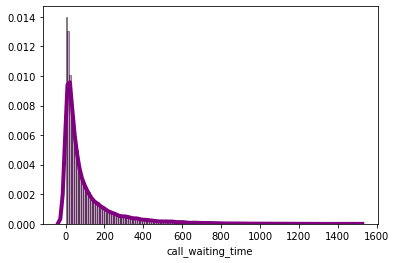

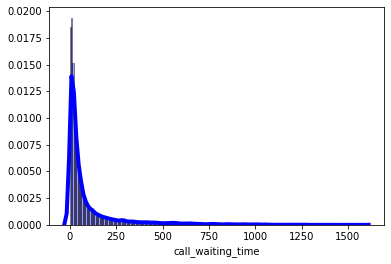

In [111]:
#and lets plot our distributions on a  histogram for both our data sets
sns.distplot(ineffective_operators['call_waiting_time'], hist=True, kde=True, 
             bins='auto', color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
plt.show()
sns.distplot(effective_operators['call_waiting_time'], hist=True, kde=True, 
             bins='auto', color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

From the histograms, our distribution for the to data sets look similair. We have a positive skew for both our data sets. Our data is not distributed normally and I will therefor be conducting a mann whitney test. This is a non-paracontinuous-level test used to detect differences between two independent data sets. In contrast to the t-test; it does not compare mean scores but median scores of two samples. The goal of the test is to test for differences of the median that are caused by the independent variableThus it is much more robust against outliers and heavy tail distributions. The Mann-Whitney U Test can be applied to any distribution, whether it is Gaussian or not, and can thus be applied to our data set which is positively skewed. 

In [112]:
#lets get the mean and std for each of our data sets 
print('The median call_waiting_time for ineffective operators is:',ineffective_operators.call_waiting_time.median())
print('The STD for ineffective operators is:', ineffective_operators.call_waiting_time.std())
print('The median call_waiting_time for effective operators is:',effective_operators.call_waiting_time.median())
print('The STD for effective operators is:', effective_operators.call_waiting_time.std())

The median call_waiting_time for ineffective operators is: 51.0
The STD for ineffective operators is: 150.95531325825502
The median call_waiting_time for effective operators is: 34.0
The STD for effective operators is: 183.64859730452966


#### 5.3. Testing the hypothesis <a class="anchor" id="test"></a> 

Hypothesis: Here we test the hypothesis that call duration for ineffective operators and effective operators differ. 

- H0: There is no difference between the average waiting time for ineffective and effective operators differs
- H1: There is a difference between he average waiting time for ineffective and effective operators differs
- Critical statistical significance: 5%

In [113]:
# Carrying out the Wilcoxon–Mann–Whitney test

effective_operators_data=effective_operators.call_waiting_time
ineffective_operators_data=ineffective_operators.call_waiting_time

alpha= 0.05

results = mannwhitneyu(ineffective_operators_data, effective_operators_data)
print('p-value:', results.pvalue)
    
if (results.pvalue < alpha):
      print("we reject the null hypothesis, meaning there is a significant differencethe in average waiting time for ineffective and effective operators")
else:
    print("we can not reject null hypothesis, meaning there is no significant difference between the average waiting time for ineffective and effective operators")

p-value: 1.6407283957914092e-81
we reject the null hypothesis, meaning there is a significant differencethe in average waiting time for ineffective and effective operators


<div class="alert alert-success" role="alert">
  I like how you explained each step in testing hypothesis part. You described it very well:)
</div>

#### 5.4. Testing hypothesis summary  <a class="anchor" id="hypothesis_summary"></a> 

- The data was split into effective and ineffective operators based on the conditions from the analysis.
- The number of rows for the entire clean call data was: 34562
- The number of rows for data of ineffective operators was: 18059
- The number of rows for data of effective operators was: 16503
- The percentage of ineffective operators data from our entire clean data was: 0.5225102713963312
- The percentage of effective operators data from our entire clean data was: 0.4774897286036688
- The distribution for the to data sets looked similair and both had a positive skew 
- The data sets were not distributed normally and we therfore decided to conduct a mann whitney test in order to test the hypothesis that they avergae call wautung time differs for ineffective and effective operator. 
- The man whitney test consucted revealed that there is a significant differencethe in average waiting time for ineffective and effective operators

### 6. General conclusion  <a class="anchor" id="general_conclusion"></a>

- An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.
- Based on the analysis it was concluded that the least effective operators are those that have more than 3 missed incoming calls, less than 10 outgoing calls and a waiing time of above 1100 seconds. 
- Based on the analysis it appears that there is a significant difference in the average call waiting time for ineffective and effective operators.

### 7. Articles <a class="anchor" id="Articles"></a>

- https://www.statisticssolutions.com/conduct-mann-whitney-u-test/ I used this resource to understand if the mann whitney test was appropriate, as I could not use t test here with the data bing positively skewed and not normally distributed.
- https://towardsdatascience.com/determine-if-two-distributions-are-significantly-different-using-the-mann-whitney-u-test-1f79aa249ffb I used this resource to get a better understanding of wether or not Mann whitney is the best startistical test for the data sets. 
- https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/ i used this article to better understand how to perform the mann whitney test using in python language
- https://medium.com/ml-research-lab/unpaired-independent-non-parametric-two-sample-mann-whitney-u-test-752649f8a0d5 used for  further understanding of how to consuct mann whitney in pandas
- https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-mann-whitney-test-median-comparison/ resource was used to better understand how the mann whitney test works 

### 8. Presentation  link<a class="anchor" id="presentation"></a>

https://ufile.io/oyhrip79

### 9. Additional task link- Building a dashboard <a class="anchor" id="dashboard"></a>

https://public.tableau.com/profile/jade7386#!/vizhome/telecomoperations/CallMeMaybeTelecomDashboard?publish=yes 